### Project : Predicting Oracle Stock Price

###### Import required Python libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings

In [2]:
orcl = yf.Ticker('ORCL') # Creates a Ticker function
df1 = orcl.history('5Y') # Imports 5 year data into a Data Frame
df1.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-28 00:00:00-04:00,48.970106,49.154617,47.743084,47.743084,28230400,0.0,0.0
2019-05-29 00:00:00-04:00,47.447858,47.798436,47.097280,47.687725,12448700,0.0,0.0
2019-05-30 00:00:00-04:00,47.909144,48.001399,47.475534,47.715405,8569500,0.0,0.0
2019-05-31 00:00:00-04:00,47.272578,47.383285,46.599097,46.682129,11847100,0.0,0.0
2019-06-03 00:00:00-04:00,46.645217,47.124955,46.027093,46.349995,17434400,0.0,0.0


In [3]:
df1.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-20 00:00:00-04:00,123.800003,124.680000,123.239998,124.519997,5989000,0.0,0.0
2024-05-21 00:00:00-04:00,124.459999,125.360001,123.919998,124.629997,5549500,0.0,0.0
2024-05-22 00:00:00-04:00,124.629997,125.160004,123.300003,124.599998,5705000,0.0,0.0
2024-05-23 00:00:00-04:00,126.550003,126.699997,123.160004,124.089996,6108600,0.0,0.0
2024-05-24 00:00:00-04:00,123.419998,123.510002,121.419998,122.910004,7166100,0.0,0.0


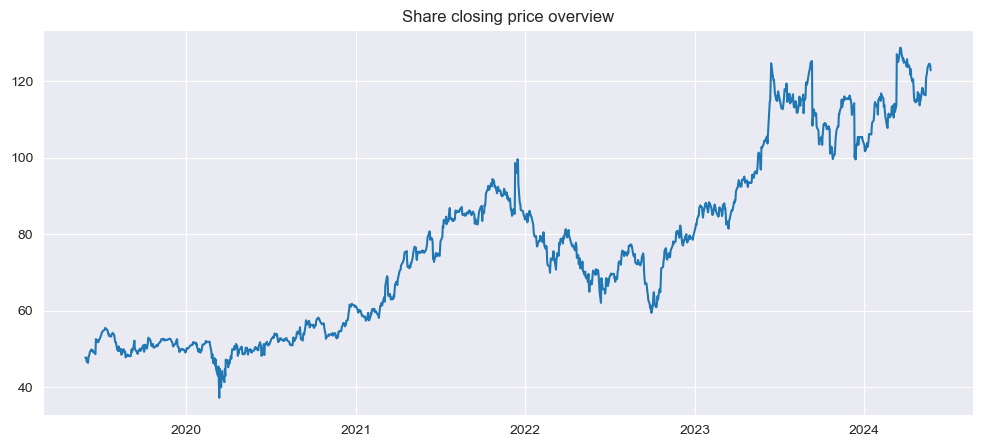

In [4]:
sns.set_style('darkgrid') #Visual style
plt.figure(figsize=(12,5))
plt.title('Share closing price overview')
plt.plot(df1.Close)

In [5]:
df1['100_dma'] = df1['Close'].rolling(100).mean()
df1['200_dma'] = df1['Close'].rolling(200).mean()
df1.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,100_dma,200_dma
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.0,1160.000000,1060.000000
mean,76.579963,77.406865,75.829862,76.617366,1.059132e+07,0.004956,0.0,75.906503,75.411096
std,23.134809,23.327225,22.907636,23.133128,6.724581e+06,0.039788,0.0,21.094091,19.079913
min,38.429883,40.560726,37.112127,37.196239,2.168200e+06,0.000000,0.0,48.462604,49.577649
25%,53.891229,54.292310,53.330742,53.778637,6.653650e+06,0.000000,0.0,54.407757,56.630506
50%,74.654327,75.399958,74.002361,74.731102,8.728500e+06,0.000000,0.0,73.378843,75.430310
75%,91.457613,92.327670,90.418890,91.534527,1.219825e+07,0.000000,0.0,87.889886,83.903523
max,130.100154,132.342916,128.535197,128.824280,6.860570e+07,0.400000,0.0,116.449996,113.377424


In [6]:
df1.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [7]:
df1.tail(5)

,Open,High,Low,Close,Volume,100_dma,200_dma
Date,,,,,,,
2024-05-20 00:00:00-04:00,123.800003,124.680000,123.239998,124.519997,5989000,115.674708,113.166110
2024-05-21 00:00:00-04:00,124.459999,125.360001,123.919998,124.629997,5549500,115.869092,113.223174
2024-05-22 00:00:00-04:00,124.629997,125.160004,123.300003,124.599998,5705000,116.060097,113.271876
2024-05-23 00:00:00-04:00,126.550003,126.699997,123.160004,124.089996,6108600,116.254145,113.322332
2024-05-24 00:00:00-04:00,123.419998,123.510002,121.419998,122.910004,7166100,116.449996,113.377424


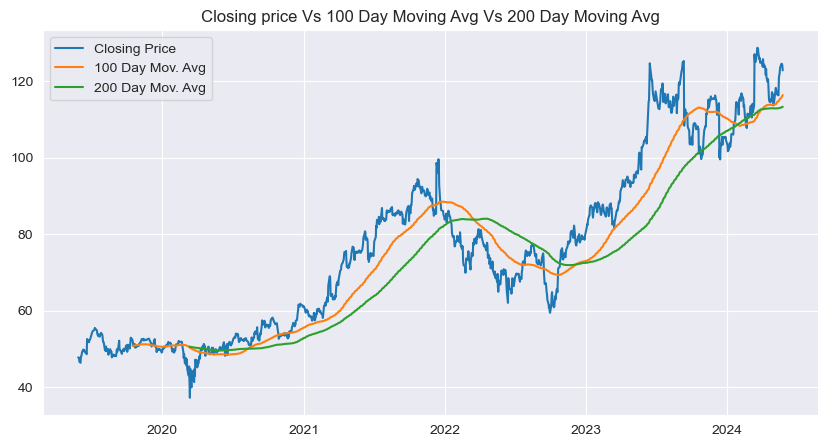

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing price Vs 100 Day Moving Avg Vs 200 Day Moving Avg')
plt.plot(df1['Close'],label='Closing Price')
plt.plot(df1['100_dma'],label='100 Day Mov. Avg')
plt.plot(df1['200_dma'],label='200 Day Mov. Avg')
plt.legend()

#### Visualizing Correlation Matrix Using Heatmap

<Axes: >

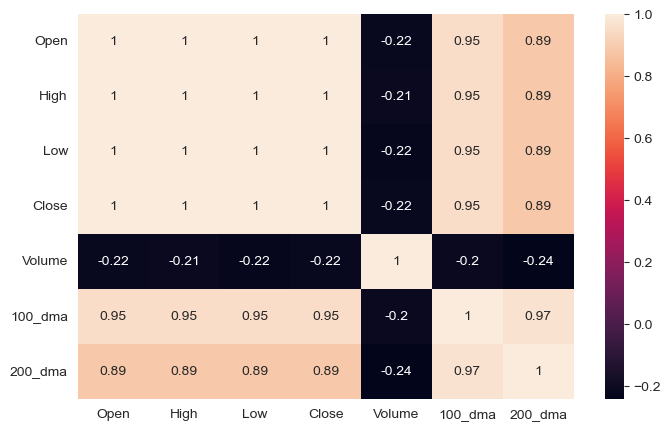

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(),annot=True)

<Axes: title={'center': '100 Day Moving Avg.'}, xlabel='100_dma', ylabel='Count'>

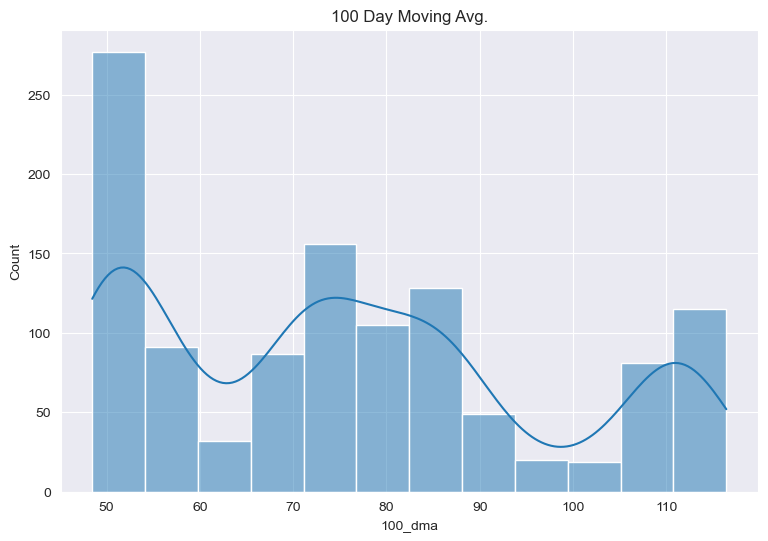

In [10]:
plt.figure(figsize=(9,6))
plt.title('100 Day Moving Avg.')
sns.histplot(x=df1['100_dma'],kde=True)

<Axes: title={'center': 'Closing Price'}, xlabel='Close', ylabel='Count'>

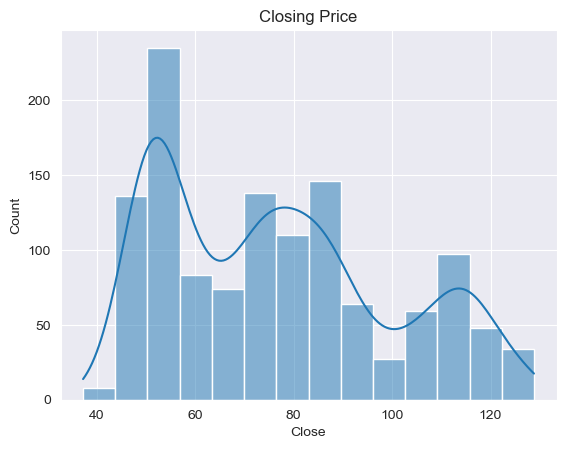

In [11]:
plt.title('Closing Price')
sns.histplot(x=df1['Close'],kde=True)

#### Importing the Formula API from Statsmodels

In [21]:
df1.rename(columns={'100_dma':'dma100'},inplace=True)
import statsmodels.formula.api as smf
model = smf.ols(formula='Close ~ dma100',data=df1)
model = model.fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        09:04:12   Log-Likelihood:                -3889.7
No. Observations:                1160   AIC:                             7783.
Df Residuals:                    1158   BIC:                             7793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7754      0.760      1.021      0.3

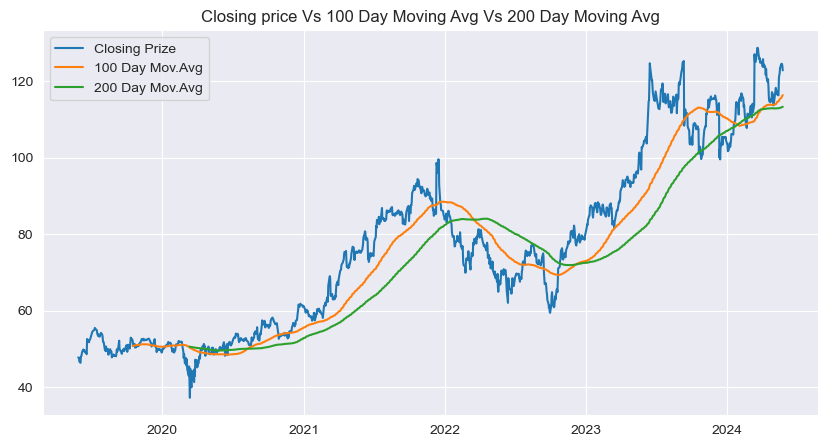

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing price Vs 100 Day Moving Avg Vs 200 Day Moving Avg')
plt.plot(df1['Close'],label='Closing Prize')
plt.plot(df1['dma100'],label='100 Day Mov.Avg')
plt.plot(df1['200_dma'],label='200 Day Mov.Avg')
plt.legend()

#### Predicting Stock Prices Using Fitted Linear Regression Model

In [26]:
import pandas as pd
prev_data = pd.DataFrame({'dma100': [108,109,110,111,112,123,124,126]})
predictions = model.predict(prev_data)
print(predictions)

0    111.825455
1    112.853696
2    113.881938
3    114.910180
4    115.938421
5    127.249079
6    128.277321
7    130.333804
dtype: float64


#### Visualizing Predicted Closing Prices Based on 100 days moving average Values

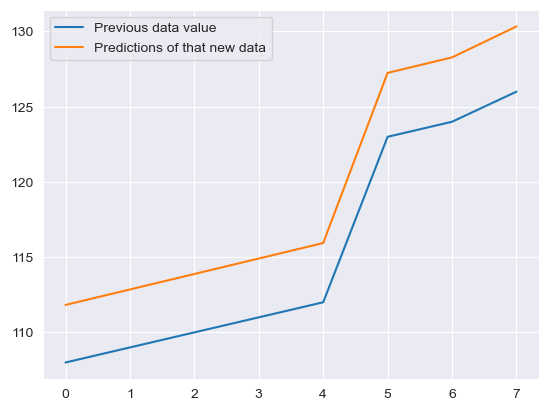

In [27]:
plt.plot(prev_data,label='Previous data value')
plt.plot(predictions,label = 'Predictions of that new data')
plt.legend()